In [1]:
# Проанализировать датасет и выявить закономерность, 
# которая привела к недогрузу записей в биллинг. 
# Визуализировать решение любым удобным способом.

In [2]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---

###### DESCRIPTION
event_starttime - дата/время старта события

user_id - id абонента

apn - access point name

cost - стоимость события

duration - длительность

service_id - id события

tarrif_plan_id - тарифный план

rejected - статус успешности прогрузки в билинг записи(0-успешно, 1-неуспешно)

---

In [3]:
file_path = 'Домашнє завдання_Data Analytics.xlsx'

# Чтение последнего листа из Excel-файла
all_sheets = pd.ExcelFile(file_path).sheet_names
last_sheet_name = all_sheets[-2]

df = pd.read_excel(file_path, sheet_name=last_sheet_name)

In [4]:
df

,event_starttime,user_id,apn,cost,duration,service_id,tarrif_plan_id,rejected
0,2020-01-18 12:56:40,96351.087426,internet,0.0,44628,756.70,433,1
1,2020-01-18 23:49:20,100241.419527,internet,0.0,61034,790.20,433,0
2,2020-01-18 14:36:05,86198.589201,internet,0.0,29274,793.89,164,0
3,2020-01-18 10:24:24,78134.257479,internet,0.0,53764,756.31,433,1
4,2020-01-19 02:34:09,51676.883555,internet,0.0,30,756.31,433,0
...,...,...,...,...,...,...,...,...
24173,2020-01-19 06:21:46,59017.920696,internet,0.0,30,756.31,433,0
24174,2020-01-19 00:19:04,103187.370898,internet,0.0,3684,790.05,433,1
24175,2020-01-19 16:56:28,12543.755925,internet,0.0,45,756.31,433,0
24176,2020-01-19 11:29:07,17694.980407,internet,0.0,25218,532.99,433,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24178 entries, 0 to 24177
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   event_starttime  24178 non-null  datetime64[ns]
 1   user_id          24178 non-null  float64       
 2   apn              24178 non-null  object        
 3   cost             24178 non-null  float64       
 4   duration         24178 non-null  int64         
 5   service_id       24178 non-null  float64       
 6   tarrif_plan_id   24178 non-null  int64         
 7   rejected         24178 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 1.5+ MB


In [6]:
# Подивимось на кореляцію.
df.corr(numeric_only=True)['rejected'].sort_values()[:-1]

user_id          -0.007579
tarrif_plan_id   -0.005708
cost             -0.003943
service_id        0.003401
duration          0.495768
Name: rejected, dtype: float64

In [7]:
# Бачимо що є залежність тільки з колонкою duration.

In [8]:
df.groupby('rejected').mean(numeric_only=True)

,user_id,cost,duration,service_id,tarrif_plan_id
rejected,,,,,
0,56377.734854,0.018445,10279.938336,775.161436,320.628925
1,55836.167071,0.012908,40378.656557,775.460650,317.838730


Бачимо також, що середнє значення відрізняєтся тільки в duration.

Для того, щоб впевнетись можемо зобразити boxplot.

In [9]:
df.groupby('rejected')['duration'].describe().transpose()

rejected,0,1
count,19298.000000,4880.000000
mean,10279.938336,40378.656557
std,20525.547768,23516.174704
min,1.000000,6.000000
25%,30.000000,21872.000000
50%,623.500000,38229.500000
75%,7665.000000,56056.250000
max,86440.000000,91227.000000


<Axes: xlabel='duration', ylabel='rejected'>

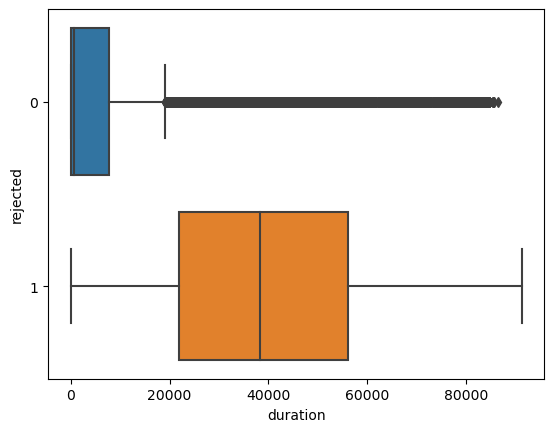

In [10]:
sns.boxplot(data=df, orient='h', x='duration', y='rejected')

# Висновок

На цьому графіку та в таблиці ми чітко бачимо, що для rejected = 0 
велика кількість даних знаходятья до 8000, а чорні "кружки", які ми бачимо це є викиди.
На графіку з rejected = 1 ми чітко бачимо що велика кількість даних знаходиться в діапазоні від 20000 до 6000, що є набагато довше ніж в першому випадку.

>Отже можна сказати, що більш висока тривалість використання послуги (duration) здається пов'язаною з більш високою ймовірністю, що запис буде відхилено (rejected).
Це може бути спричинено, наприклад, проблемами під час запису довгострокових сесій або технічними аспектами, які виникають під час обробки тривалих активностей.